In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("tested.csv")

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [12]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
print(dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


 Percentage Example
💡 Objective: What percentage of passengers survived?

In [17]:
# Percentage Example
# Objective: What percentage of passengers survived?

In [23]:
# Total passengers
total_passengers = dataset.shape[0]
total_passengers

418

In [21]:
# Count of survivors (Survived == 1)
survived_count = dataset['Survived'].sum()
survived_count

152

In [22]:

# Percentage of survivors
survival_percentage = (survived_count / total_passengers) * 100

print(f"🎯 Percentage of passengers who survived: {survival_percentage:.2f}%")

🎯 Percentage of passengers who survived: 36.36%


In [24]:
#Percentiles Example Objective: Calculate the 25th, 50th, and 75th percentiles of Age

In [25]:
# Remove NaN to avoid errors
age_clean = dataset['Age'].dropna()
age_clean

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [26]:
# Calculate percentiles
p25 = np.percentile(age_clean, 25)
p50 = np.percentile(age_clean, 50)  # Median
p75 = np.percentile(age_clean, 75)

print(f"📊 Age Percentiles:\n25th: {p25}\n50th (Median): {p50}\n75th: {p75}")

📊 Age Percentiles:
25th: 23.0
50th (Median): 30.272590361445783
75th: 35.75


In [27]:
#Quartiles + IQR + Outlier Detection
#💡 Objective: Use quartiles of Fare to calculate IQR and detect outliers.

In [28]:
# Remove NaNs from Fare
fare_clean = dataset['Fare'].dropna()
fare_clean

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 417, dtype: float64

In [29]:
# Quartiles
q1 = fare_clean.quantile(0.25)
q2 = fare_clean.quantile(0.50)
q3 = fare_clean.quantile(0.75)

In [30]:
# IQR
iqr = q3 - q1
iqr

23.6042

In [31]:
# Outlier bounds
lower_bound = q1 - 1.5 * iqr
lower_bound
upper_bound = q3 + 1.5 * iqr
upper_bound

66.9063

In [32]:
# Detect outliers
outliers = fare_clean[(fare_clean < lower_bound) | (fare_clean > upper_bound)]
outliers

print(f"📦 Fare Quartiles:\nQ1: {q1}\nQ2 (Median): {q2}\nQ3: {q3}")
print(f"📐 IQR: {iqr}")
print(f"🚨 Outlier Thresholds: < {lower_bound} or > {upper_bound}")
print(f"🔍 Number of Fare Outliers: {outliers.count()}")

📦 Fare Quartiles:
Q1: 7.8958
Q2 (Median): 14.4542
Q3: 31.5
📐 IQR: 23.6042
🚨 Outlier Thresholds: < -27.5105 or > 66.9063
🔍 Number of Fare Outliers: 55


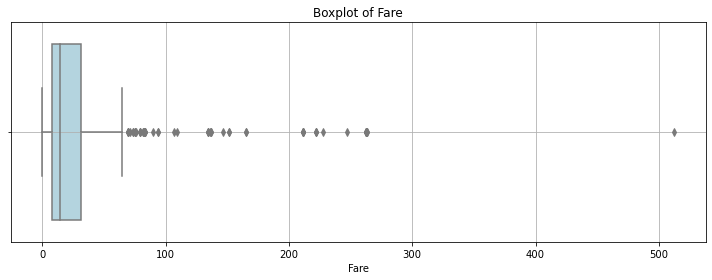

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaNs for clean plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Fare'], color='lightblue')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.grid(True)
plt.tight_layout()
plt.show()

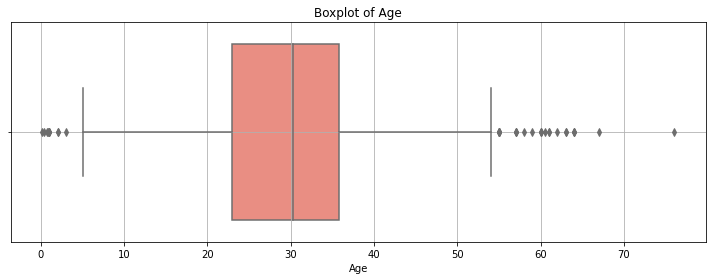

In [34]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Age'].dropna(), color='salmon')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Remove NaNs for Fare
fare_clean = dataset['Fare'].dropna()

# Calculate IQR
q1 = fare_clean.quantile(0.25)
q3 = fare_clean.quantile(0.75)
iqr = q3 - q1

# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter: Keep only non-outliers
dataset_no_outliers = dataset[(dataset['Fare'] >= lower_bound) & (dataset['Fare'] <= upper_bound)]

print(f"Original dataset size: {dataset.shape[0]}")
print(f"Dataset size after removing Fare outliers: {dataset_no_outliers.shape[0]}")


Original dataset size: 418
Dataset size after removing Fare outliers: 362


C:\Users\SARIKA\OneDrive\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


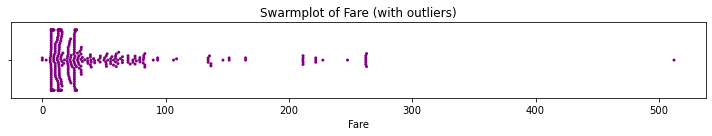

In [36]:
# Swarmplot for Fare
plt.figure(figsize=(10, 2))
sns.swarmplot(x='Fare', data=dataset, color='purple', size=3)
plt.title('Swarmplot of Fare (with outliers)')
plt.tight_layout()
plt.show()


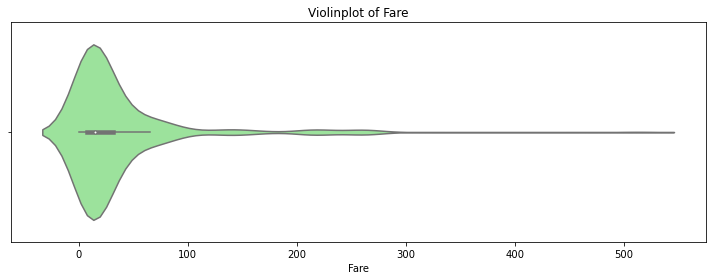

In [37]:
# Violinplot shows distribution + boxplot + KDE
plt.figure(figsize=(10, 4))
sns.violinplot(x='Fare', data=dataset, inner='box', color='lightgreen')
plt.title('Violinplot of Fare')
plt.tight_layout()
plt.show()

In [38]:
# Drop rows with NaN in Age or Fare first
df = dataset[['Age', 'Fare']].dropna()

# Age IQR
q1_age = df['Age'].quantile(0.25)
q3_age = df['Age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_age = q1_age - 1.5 * iqr_age
upper_age = q3_age + 1.5 * iqr_age

# Fare IQR
q1_fare = df['Fare'].quantile(0.25)
q3_fare = df['Fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare
lower_fare = q1_fare - 1.5 * iqr_fare
upper_fare = q3_fare + 1.5 * iqr_fare

# Remove outliers in both
df_clean = df[(df['Age'] >= lower_age) & (df['Age'] <= upper_age) &
              (df['Fare'] >= lower_fare) & (df['Fare'] <= upper_fare)]

print(f"Rows before removing outliers: {df.shape[0]}")
print(f"Rows after removing outliers: {df_clean.shape[0]}")


Rows before removing outliers: 417
Rows after removing outliers: 339
